<h2>Future Exploration</h2>
<ul>
    <li>
        Formula for iterated function system to produce binary image given a modulus
    </li>
    <li>
        Fractal dimension for IFS attractor given the modulus
    </li>
    <li>
        Why prime moduli create similar, even patterns
    </li>
    <li>
        Relationship between image and prime factorization of the modulus
    </li>
    <li>
        Following paths in the numbers for the reduced triangle
    </li>
</ul>

# Imports

In [1]:
import time
import numpy as np
from matplotlib import pyplot
from math import factorial

# Modular_Pascal

In [2]:
"""
    It has been observed that when the entries in Pascal's Triangle are reduced
modulo 2, and 0's and 1's are colored differently, the image of the Sierpinski
Gasket emerges. 
    I decided to examine what patterns are produced when Pascal's Triangle is reduced
modulo an arbitrary integer m.
    Modular_Pascal defaults to binary mode, where the image has either a 0
(where an entry is congruent to zero modulo the modulus) or a 1 otherwise.
An alternative mode fills in the image with the values modulo the modulus.

USAGE
triangle = Modular_Pascal(size, modulus) 
    Create an object for Pascal's triangle with a a number of rows = size, reduced 
    by the given modulus
    Additional parameters: mode and scale.
    mode = binary (either congruent to zero or not)
    size = scale of image multiplied by the size
    
triangle.display_image()
    Show the image resulting from coloring the entries congruent to zero modulo the
    modulus differently from other entries.

triangle.print_ascii()
    Prints a version of the image using ASCII characters. Entries are printed as a 
    '-' if congruent to 0 modulo the modules, anda s a '*' otherwise.
"""
class Modular_Pascal:
    def __init__(self, modulus, size, mode="binary", scale=2):
        self.modulus = modulus
        self.size = size;
        self.mode = mode;
        self.scale = scale
        self.create_image();
        
    """
    create_image() - Helper function used by the constructor to create the image array.
        The image has a 2x2 square for each entry.
    """
    def create_image(self):
        image_size = self.scale * self.size
        self.image = np.zeros((image_size, image_size));
        # The nth row of Pascal's triangle consists of nCr for r = 0, 1, ..., n
        for n in range(0, self.size + 1):
            image_row = self.scale * n
            for k in range(0, n + 1):
                num = choose(n,k)
                color = num % self.modulus
                # Only values in binary mode should be 0 or 1
                if (self.mode == "binary"):
                        color = (color != 0)
                # Calculate where in the image the current entry should be
                left_end = (image_size // 2) - ((self.scale //2) * (n + 1)) + (self.scale * k)
                self.image[image_row : image_row + self.scale,
                        left_end : left_end + self.scale] = color
                
    def display_image(self):
        pyplot.imshow(self.image)
        pyplot.axis('off')
        # For a list of available colormaps, see
        # http://matplotlib.org/examples/color/colormaps_reference.html
        pyplot.set_cmap('inferno')
        pyplot.colorbar()
        pyplot.show()
        
    def print_ascii(self):
        for n in range(0, self.size):
            string = ''
            for k in range(0, n + 1):
                num = int(choose(n,k))
                string += '-' if (num % self.modulus == 0) else '*'
            # Center each line to create non-right triangle
            print(string.center(80, ' '))

"""
choose(n, k) computes nCk = n choose k = n!/k!(n-k)!
"""
def choose(n, k):
    # Note that // operator forces integer division
    # See https://www.python.org/dev/peps/pep-0238/
    return int(factorial(n) // (factorial(k) * factorial(n - k))) 

                                       *                                        
                                       **                                       
                                      ***                                       
                                      ****                                      
                                     *-*-*                                      
                                     ******                                     
                                    ***-***                                     
                                    ********                                    
                                   *---*---*                                    
                                   **--**--**                                   
                                  ***-*-*-***                                   
                                  ************                                  
                            

(640, 640)


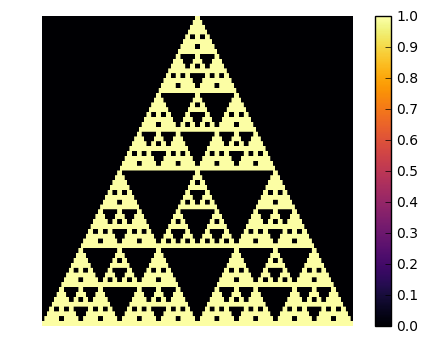

In [23]:
# Notice regularity in odd primes and
# nested Sierpinski's in powers of 2
modulus = 4
size = 64

mode = "binary"
scale = 10

test = Modular_Pascal(modulus, size, mode, scale);
print(np.shape(test.image))
test.display_image();

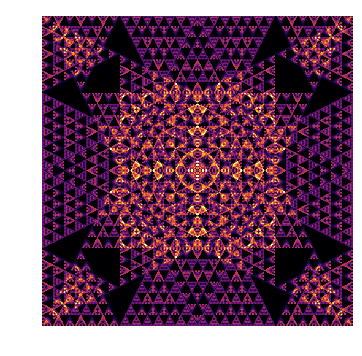

In [15]:
"""
    In this cell we observe the patterns we can create by superimposing multiple triangles
reduced by the same modulus. We rotate the image by 90 degrees to create four copies
and add them together to produce a symmetrical pattern.
"""
size = 196
mode = "continuous"
modulus = 7
scale = 4

first = Modular_Pascal(modulus, size, mode, scale)
second = Modular_Pascal(modulus, size, mode, scale)
third = Modular_Pascal(modulus, size, mode, scale)
fourth = Modular_Pascal(modulus, size, mode, scale)

image = first.image
image += np.flipud(second.image)
image += np.rot90(third.image)
image += np.fliplr(np.rot90(fourth.image))
image = image
pyplot.imshow(image)
pyplot.axis('off')
#pyplot.savefig('test.png', dpi = 3*144)
pyplot.show()
